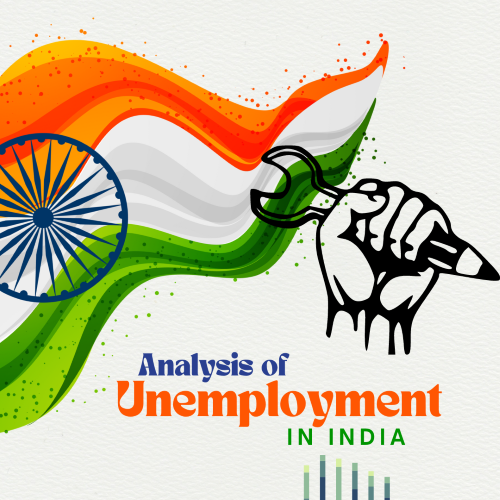

# Introduction
**Unemployment** is a critical economic indicator that reflects the health of a country's labor market. In this analysis, we examine unemployment trends across various regions in India, exploring the distribution, variability, and trends in unemployment rates. Additionally, we investigate labor participation rates and employment figures to provide a comprehensive overview of the labor market.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")
df2=pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/unemployment-in-india/Unemployment in India.csv'

# Data Overview: 
We utilized two datasets focusing on unemployment in India, covering multiple regions and spanning various time periods. The data was pre-processed to handle missing values, remove inconsistencies, and standardize column names. This preparation ensured the accuracy and reliability of our analysis.

In [3]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df1=df1.dropna()

In [8]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df1.shape

(740, 7)

In [10]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
#remove leading and trailing spaces from the column names
df1.columns = df1.columns.str.strip()

In [12]:
df1["Estimated Unemployment Rate (%)"]

0       3.65
1       3.05
2       3.75
3       3.32
4       5.17
       ...  
749     7.55
750     6.67
751    15.63
752    15.22
753     9.86
Name: Estimated Unemployment Rate (%), Length: 740, dtype: float64

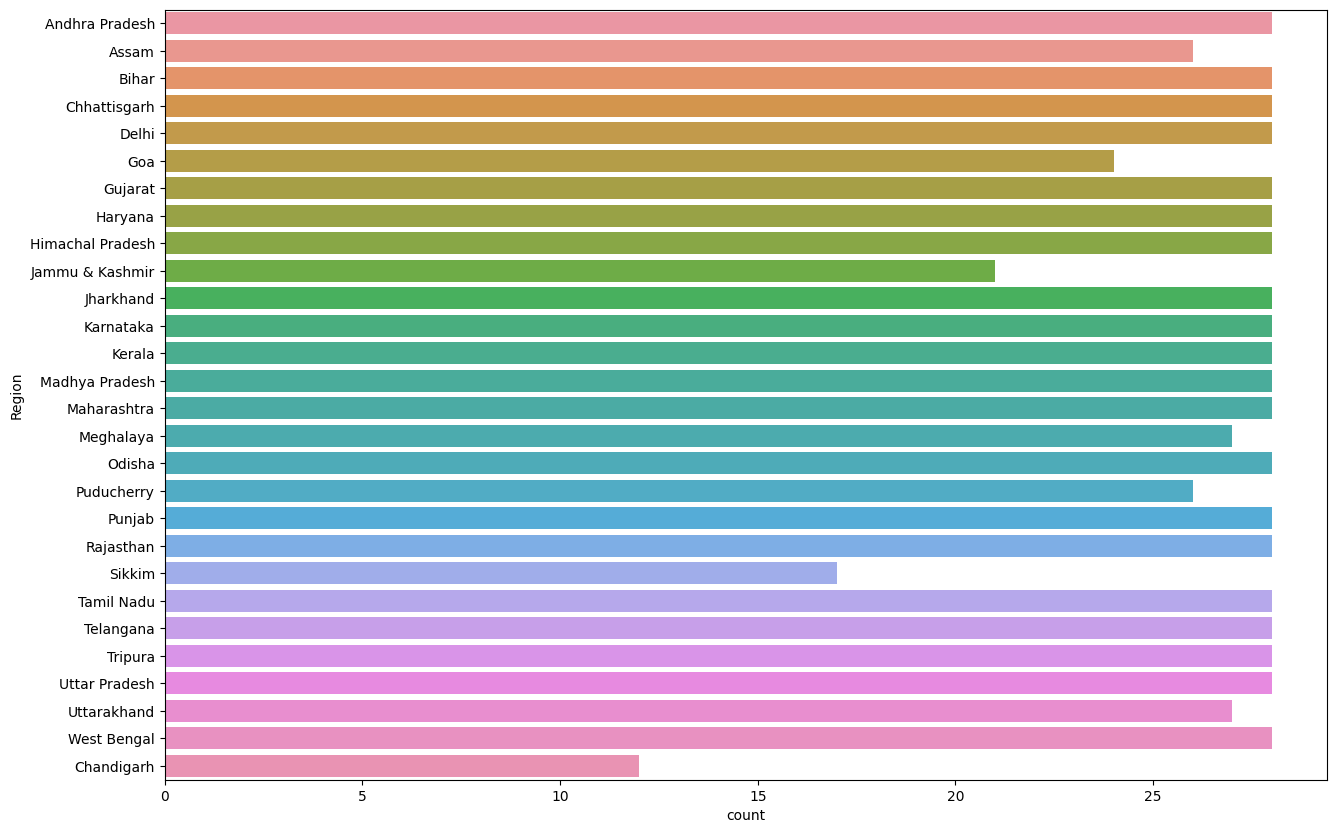

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(y="Region",data=df1)
plt.show()


+ Analysis and Conclusion:

The count plot reveals an uneven distribution of unemployment rate observations across regions, with certain areas significantly over- or under-represented. Regions with fewer observations might not reflect the true economic conditions, necessitating careful interpretation.

# AVG,HIGH,LOWEST Unemployment Rate

In [14]:
avg_unemployment_rate=df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")

state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


In [15]:
avg_unemployment_rate

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64

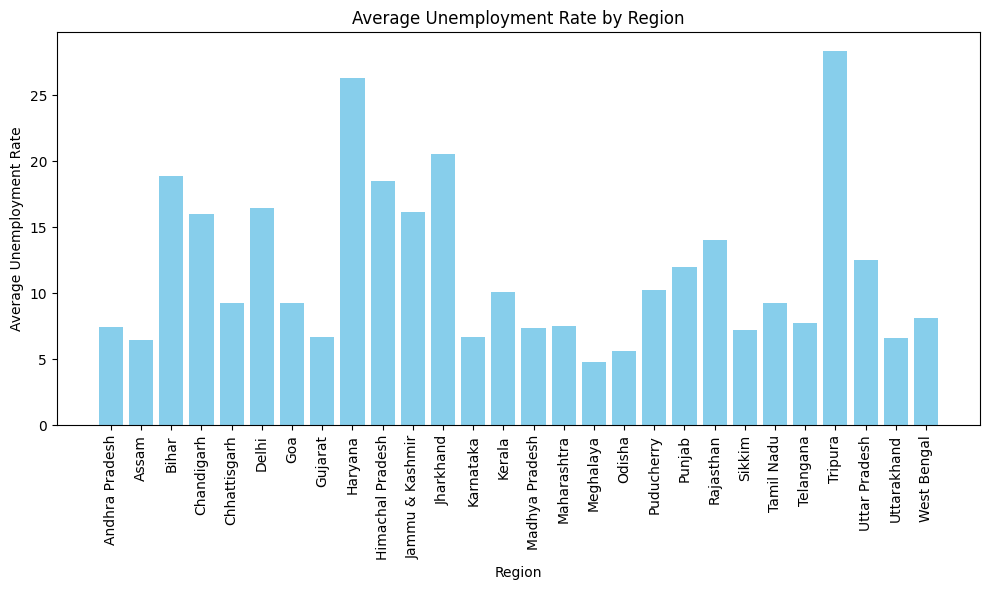

In [16]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

+ Analysis and Conclusion:

The bar plot displays the average unemployment rates by region, revealing notable differences. Regions like "Tripura" and "Haryana" have the highest average unemployment rates, indicating significant challenges in their labor markets. In contrast, regions such as "Meghalaya" and "Odisha" have lower unemployment rates, suggesting more robust economic conditions and better job availability. This disparity highlights the varying economic health across regions.

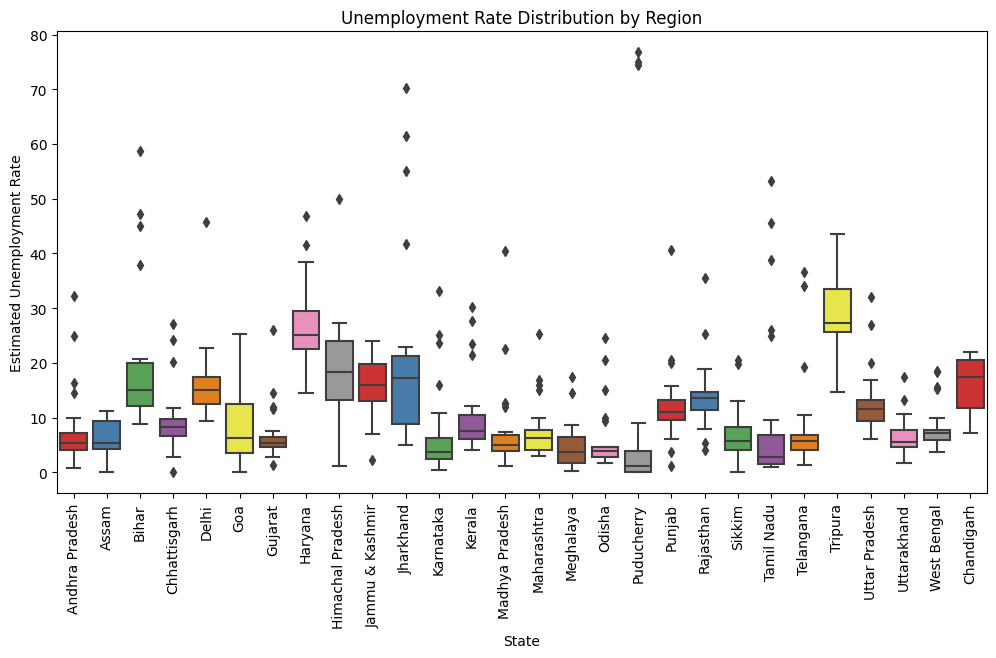

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1,palette="Set1")
plt.title("Unemployment Rate Distribution by Region")
plt.xlabel("State")
plt.ylabel("Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.show()

+ Analysis and Conclusion:

The box plot illustrates the variability in unemployment rates across regions, highlighting differences in economic stability. Regions with broad interquartile ranges (IQR) and numerous outliers, such as "Haryana," "Himachal Pradesh," and "Tripura," exhibit considerable unemployment rate fluctuations, suggesting potential economic instability. Conversely, regions like "Tamil Nadu" and "Uttarakhand" have narrower distributions and fewer outliers, indicating more stable and consistent economic conditions.

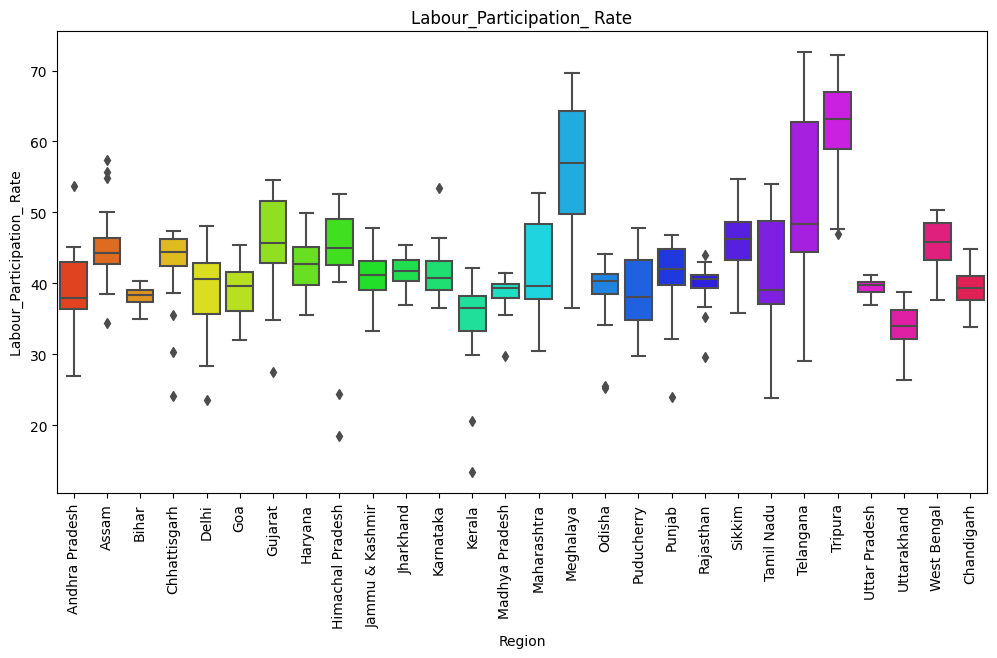

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df1,palette="hsv")
plt.title("Labour_Participation_ Rate")
plt.xlabel("Region")
plt.ylabel("Labour_Participation_ Rate")
plt.xticks(rotation=90)
plt.show()

+ Analysis and Conclusion:

The box plot reveals the distribution of labor participation rates across regions in India, indicating variations in labor market engagement. Regions like "Meghalaya," "Tamil Nadu," and "Telangana" show significant fluctuations, which may point to economic instability or the impact of policy changes. In contrast, "Punjab" and "Haryana" exhibit more stable labor participation rates, suggesting a more consistent labor market and potentially reflecting a resilient economic environment.

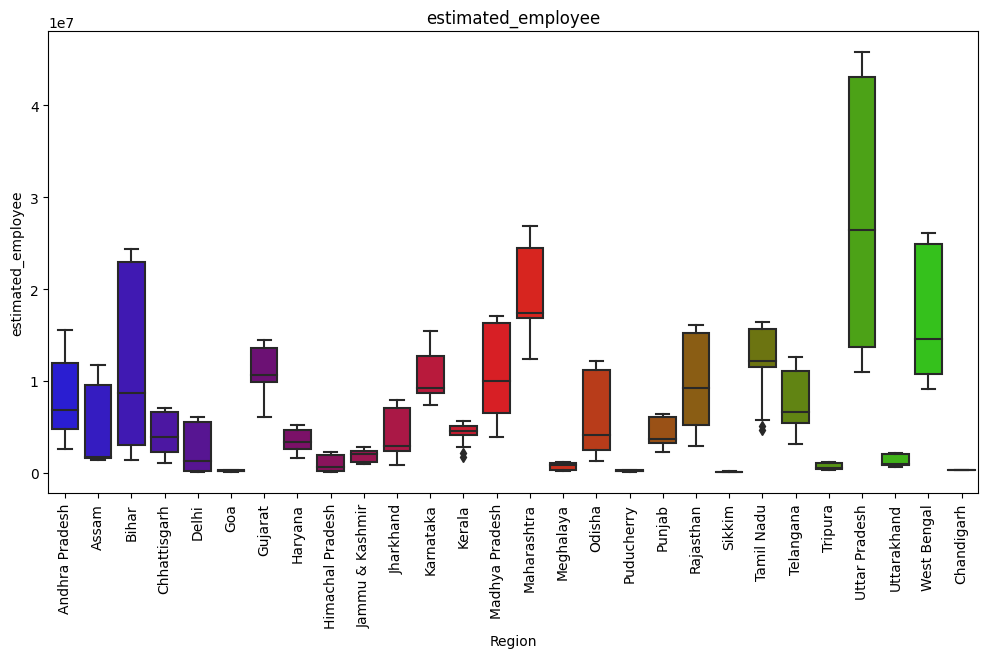

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Employed', data=df1,palette="brg")
plt.title("estimated_employee")
plt.xlabel("Region")
plt.ylabel("estimated_employee")
plt.xticks(rotation=90)
plt.show()

+ Analysis and Conclusion:

The box plot displays the distribution of estimated employment across various regions in India, highlighting substantial variability in some areas. Regions such as "Uttar Pradesh," "Bihar," and "West Bengal" show high variability, indicating large and diverse labor markets. Conversely, regions like "Goa" and "Puducherry" have narrower distributions, suggesting smaller and more stable labor markets. This variability likely reflects differences in population size, economic activities, and industrial presence across regions.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


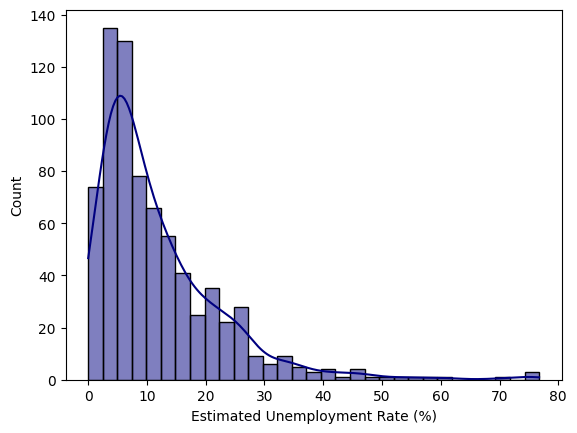

In [20]:
sns.histplot(data=df1, x="Estimated Unemployment Rate (%)", kde=True,color="navy")
plt.show()

+ Analysis and Conclusion:

The histogram illustrates the distribution of estimated unemployment rates across Indian regions, with most regions clustered at the lower end of the spectrum. The KDE curve reveals a left-skewed distribution, indicating a predominance of lower unemployment rates. However, a few regions exhibit significantly higher unemployment rates, suggesting potential regional economic challenges or structural issues. While low unemployment is widespread, the presence of higher rates in some areas points to specific concerns that may require targeted economic interventions.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


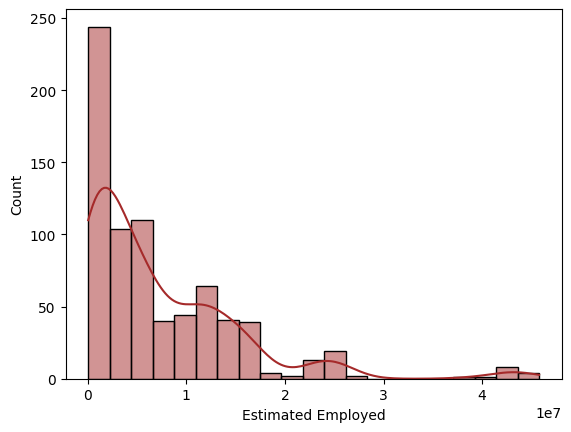

In [21]:
sns.histplot(data=df1, x="Estimated Employed", kde=True,color="brown")
plt.show()

+ Analysis and Conclusion:

The histogram illustrates that most regions have lower employment figures, with a few regions displaying significantly higher employment numbers. The right-skewed distribution is confirmed by the KDE curve, indicating that while low employment is common, a few regions exhibit much higher figures. This suggests variations in regional economic conditions or population differences.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


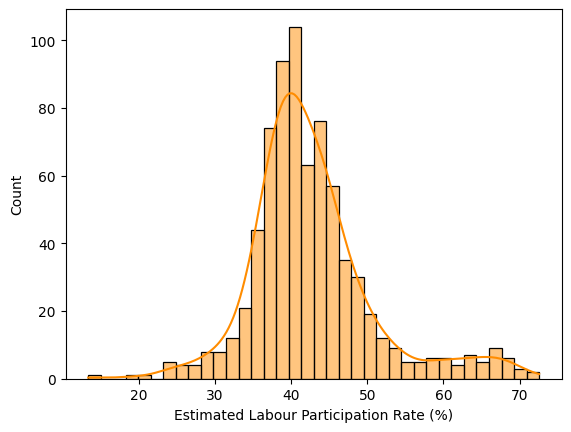

In [22]:
sns.histplot(data=df1, x="Estimated Labour Participation Rate (%)", kde=True,color="darkorange")
plt.show()

+ Analysis and Conclusion:

The histogram displays the distribution of estimated labor participation rates across regions, showing a near-normal distribution with most regions around a 40% participation rate. The KDE curve reinforces this central tendency. This indicates that most regions have a typical level of labor market engagement, with consistent rates and minimal deviations towards the extremes.

# Visualisation of Unemployment Rate and Labor Participation Rate

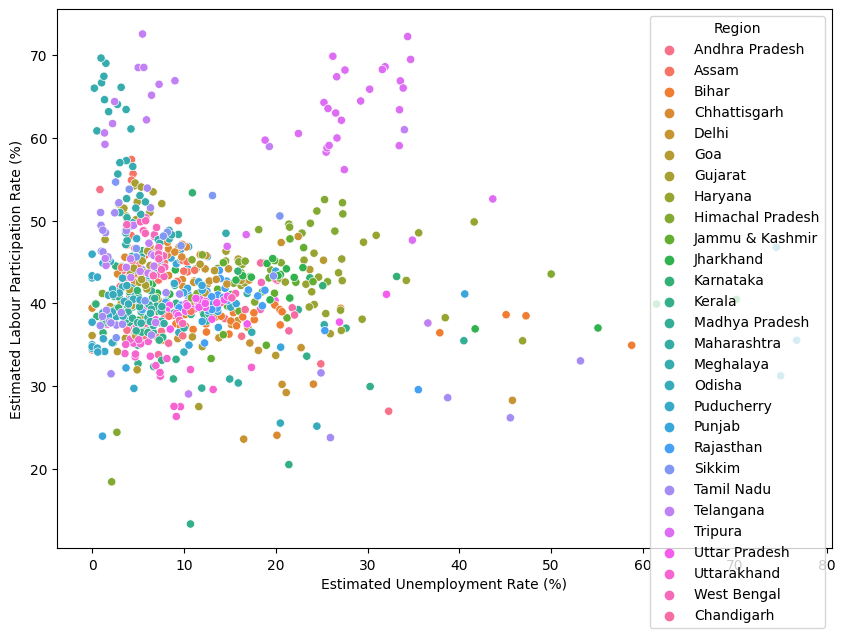

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df1, x="Estimated Unemployment Rate (%)", y="Estimated Labour Participation Rate (%)", hue="Region")
plt.show()

+ Analysis and Conclusion:

The scatter plot reveals a negative correlation between unemployment and labor participation rates across Indian states, indicating that higher unemployment is typically linked to lower labor force participation. To improve labor force engagement, it may be essential to address unemployment issues. Implementing targeted policies to address regional disparities could enhance both participation and employment outcomes.

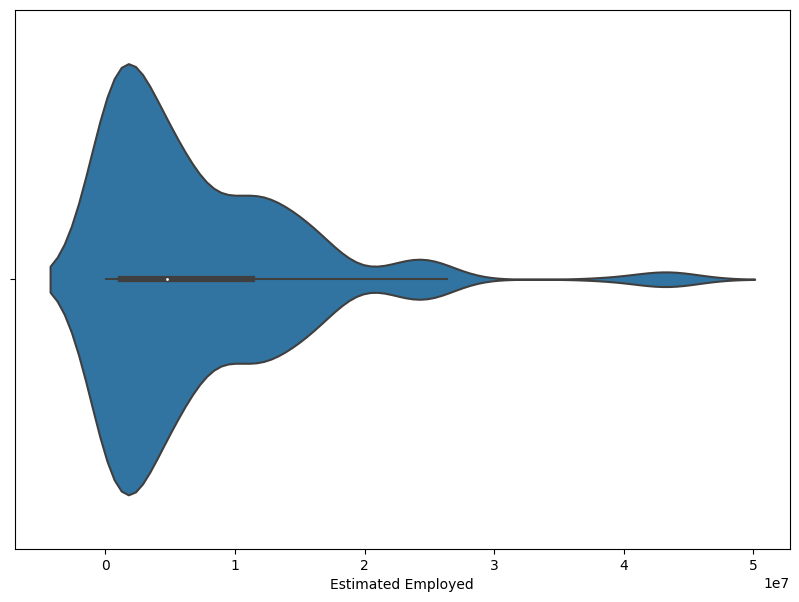

In [24]:
plt.figure(figsize=(10,7))
sns.violinplot(x=df1["Estimated Employed"])
plt.show()

+ Analysis and Conclusion:

The violin plot reveals that most regions report relatively low estimated employment numbers. Employment figures are predominantly concentrated in the lower range, with only a few regions showing significantly higher numbers.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable 

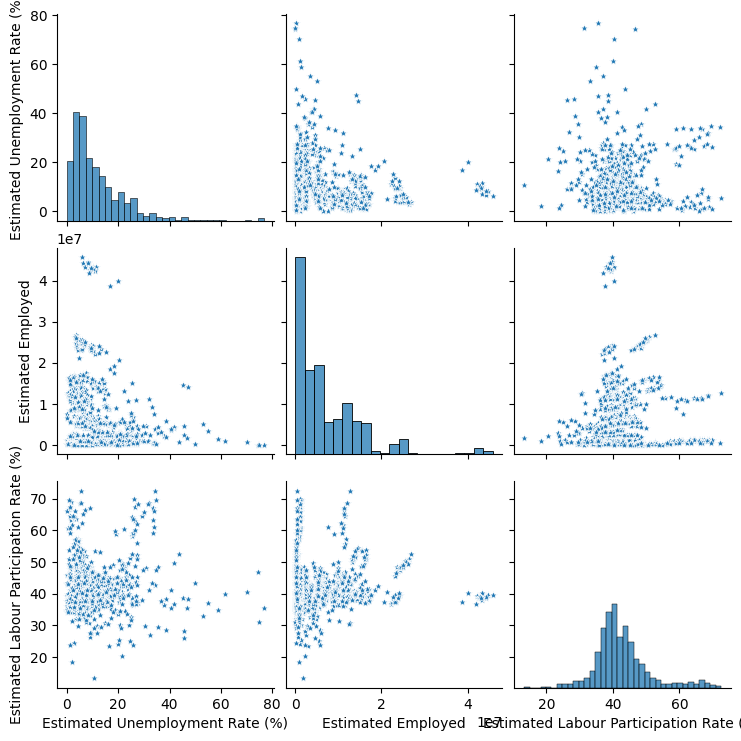

In [25]:
pair=df1[["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]]
sns.pairplot(pair,markers="*",palette="winter")
plt.show()

+ Analysis and Conclusion:

The scatter plots reveal a negative correlation between the unemployment rate, the number of employed individuals and the labor participation rate. This suggests that higher unemployment is associated with fewer employed individuals and a lower labor participation rate. To improve both employment numbers and labor participation, addressing unemployment challenges in India through targeted policies could be effective.

In [26]:
df1["Area"].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

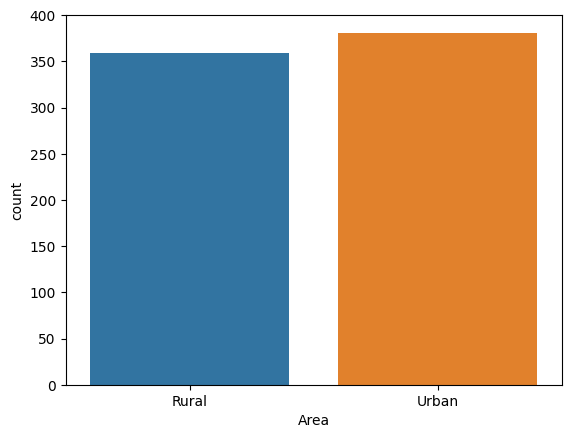

In [27]:
sns.countplot(x="Area",data=df1)
plt.show()

+ Analysis and Conclusion:

The count plot shows a higher frequency of observations in Urban areas compared to Rural areas. This indicates a potential bias towards urban data, which may limit the generalizability of findings and obscure the true unemployment challenges faced in rural regions.

# Unemployment in India in 2020

In [28]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [29]:
df2.shape

(267, 9)

In [30]:
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [31]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [32]:
#remove leading and trailing spaces from the column names
df2.columns = df2.columns.str.strip()

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [34]:
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


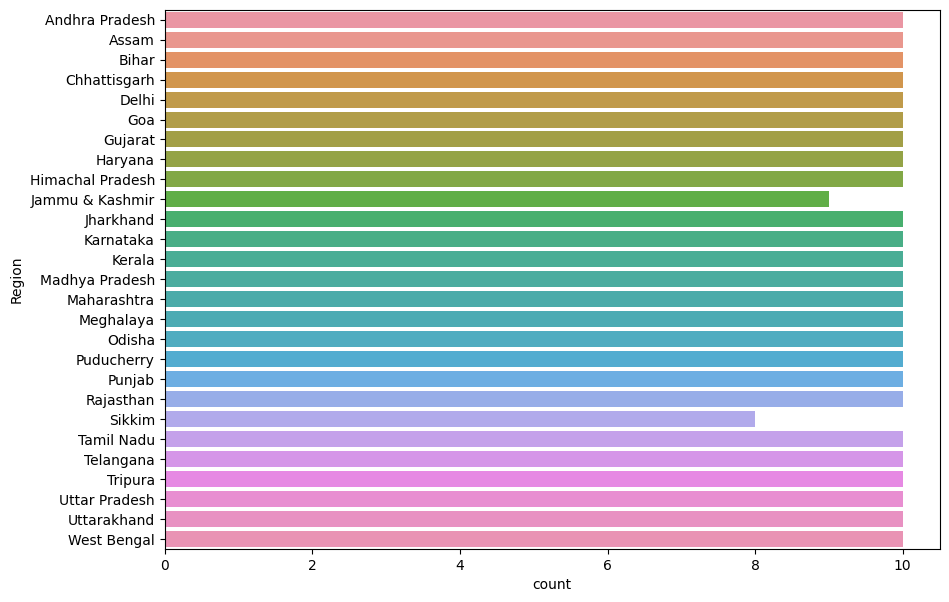

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(y="Region",data=df2)
plt.show()

+ Analysis and Conclusion:

The count plot shows varying frequencies of observations across Indian regions, with some states having higher counts than others. This uneven distribution may affect the representativeness of the analysis. When interpreting results and drawing conclusions about regional unemployment patterns, it is important to account for this imbalance to ensure accurate and fair assessments.

In [36]:
import plotly.express as px
fig = px.bar(df2, x="Region", y="Estimated Employed", title="Estimated Employed", 
             animation_frame='Date',template='plotly',color="Region.1")
fig.show()


+ Analysis and Conclusion:

The bar chart illustrates significant disparities in estimated employment levels across Indian states from January to October 2020, with the "North" region consistently showing higher figures. This persistent dominance suggests the need for a detailed investigation into the factors driving this disparity. To promote balanced economic growth, it is essential to develop targeted policies to boost employment in other regions while sustaining the employment gains in the "North."

In [37]:
fig = px.bar(df2, x="Region", y="Estimated Unemployment Rate (%)", title="unemployee rate 2020", 
             animation_frame='Date',template='plotly',color="Region")
fig.show()

+ Analysis and Conclusion:

The bar chart shows notable disparities in estimated unemployment rates across Indian states from January to October 2020. While most states experienced fluctuations, some consistently had higher unemployment rates. This highlights the need to identify these regions and analyze the underlying causes to develop targeted policies that address regional unemployment imbalances effectively.

In [38]:
fig = px.bar(df2, x="Region", y="Estimated Labour Participation Rate (%)", title="labour_rate 2020", 
             animation_frame='Date',template='plotly',color="Region.1")
fig.show()

+ Analysis and Conclusion:

The bar charts reveal that "Telangana," "Assam," "Meghalaya," and "Tripura" consistently have higher labor participation rates, often exceeding 50% in the second half of 2020. In contrast, "Kerala" and "Puducherry" show lower participation rates, generally below 30%. While most regions maintain participation rates between 40% and 60%, the significant disparities highlight stronger workforce engagement in certain regions and notable regional differences in labor participation.

# Time Series Line Plot for Unemployment Rate by Region

In [39]:
fig = px.line(df2, x='Date', y="Estimated Unemployment Rate (%)", color='Region.1',
                    title='Unemployment Rate Over Time', template='plotly')
fig.show()

+ Analysis and Conclusion:

The line plot shows fluctuations in unemployment rates over time across different regions, with notable spikes around mid-2020. Regions such as the Northeast and North experienced sharp increases, likely due to economic disruptions like the COVID-19 pandemic. Conversely, other regions maintained relatively stable unemployment levels throughout the year, indicating varying regional impacts and resilience.

# Bar Plot for Average Unemployment Rate by Region

In [40]:
avg_unemployment = df2.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

bar_plot = px.bar(avg_unemployment, x='Region', y='Estimated Unemployment Rate (%)',
                   title='Average Unemployment Rate by Region', template='plotly')
bar_plot.show()

+ Analysis and Conclusion:

The bar plot displays significant variability in average unemployment rates across regions. Regions such as "Tripura" and "Haryana" exhibit notably higher average rates, indicating they may have faced more severe economic challenges. Conversely, regions like "Assam" and "Meghalaya" show lower average rates, suggesting relatively better employment conditions. This information can assist policymakers in crafting tailored employment strategies for different regions.

# Bar Plot for Average labour Rate by Region

In [41]:
avg_unemployment = df2.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()

bar_plot = px.bar(avg_unemployment, x='Region', y='Estimated Labour Participation Rate (%)',
                   title='Average labour Rate by Region', template='plotly')
bar_plot.show()

+ Analysis and Conclusion:

The bar plot reveals variability in average labor participation rates across regions, with some regions showing notably higher or lower rates. "Meghalaya" has the highest average labor participation rate, whereas "Kerala," "Delhi," and "Uttarakhand" have relatively lower rates. Higher participation rates may indicate more active labor markets, while lower rates could signal challenges in workforce engagement. Policymakers may need to address these challenges to enhance participation and overall economic activity in lower-performing regions.

# Visualisation of Scatter Plot for Unemployment Rateand Estimated Employed

In [42]:
fig = px.scatter(df2, x='Estimated Employed', y='Estimated Unemployment Rate (%)',
                          color='Region.1', title='Unemployment Rate vs. Estimated Employed',animation_frame="Date")
fig.show()


+ Analysis and Conclusion:

The data indicates a general trend where regions with a higher number of employed individuals tend to have lower unemployment rates. However, there is notable variation within regions, suggesting that other factors beyond the total number of employed individuals also influence unemployment rates. This illustrates how unemployment rates can differ across regions.

In [43]:
fig = px.scatter(df2, x='Region.1', y='Estimated Labour Participation Rate (%)',
                          color='Region.1', title='Region.1 vs labour rate',animation_frame="Date")
fig.show()


+ Analysis and Conclusion:

The Northeast region consistently shows high estimated labor participation rates throughout the period, indicating strong labor force engagement. This trend may be influenced by factors such as favorable economic conditions, cultural norms, and supportive government policies.

# Visualisation of Histogram for Estimated Labour Participation Rate

In [44]:
fig = px.histogram(df2, x='Estimated Labour Participation Rate (%)', color='Region.1',
                         title='Distribution of Labour Participation Rate by Region', template='plotly')
fig.show()

+ Analysis and Conclusion:

The histogram shows that the Northeast region has the highest concentration of observations in the upper ranges of labor participation rates, indicating a larger proportion of individuals actively engaged in the workforce compared to other regions. This suggests that factors such as a strong work ethic or economic necessity may drive higher labor participation in this region.

# Visualisation of Histogram for Estimated Employed

In [45]:
fig = px.histogram(df2, x='Estimated Employed', color='Region.1',
                         title='Distribution of Labour Participation Rate by Region', template='plotly')
fig.show()

+ Analysis and Conclusion:
The grouped histogram shows that the Northeast region consistently has the highest proportion of individuals across various labor participation rate ranges, indicating widespread engagement in the labor force. In contrast, regions like the South and West have a higher concentration of individuals in lower participation rate ranges, suggesting a greater proportion of people are not actively engaged in the labor force.

In [46]:
df2["Region.1"].value_counts()

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

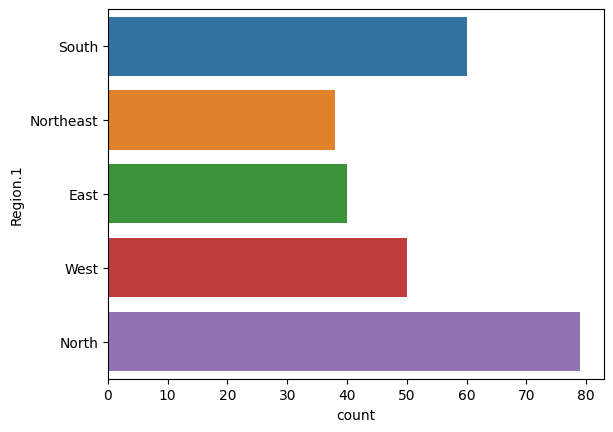

In [47]:
sns.countplot(y="Region.1",data=df2)
plt.show()

+ Analysis and Conclusion:

The bar plot illustrates that the North region has the highest number of observations, followed by the South and West regions. The Northeast and East regions have relatively lower counts. This indicates that the North region is the most prominently represented in the dataset, with varying levels of representation in other regions.

**This notebook includes comprehensive data observation techniques, offering thorough analysis and insights **